# imports

idea ==> maybe classifying instances where pcclass=-1 with the ampwalk doesnt make sense, there would probably be less noise without

the reason for doing the analysis in blocks could be that the peaks may gradually change. by creating new pcs for each block and sewing them together by another method this is counteracted.

Save pcs and cluster model to also use to sew blocks together and try to decrease block size.


- find out how to properly align the signals. maybe use the same alignment peak for all recordings or re-align after clustering..
- the hight of the peaks is not correct as it takes the difference given the whole snip. this means other peaks can be in a snip and make the hight seem bigger than it is.

In [1]:
import thunderfish.dataloader as dl
import thunderfish.pulsetracker as pt
import thunderfish.eventdetection as ed
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.interpolate import interp1d

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# parameters and functions


In [2]:
# parameters for the analysis
thresh = 0.04 # minimal threshold for peakdetection
peakwidth = 20 # width of a peak and minimal distance between two EODs

In [3]:
# I want to plot pc classes too

def plot_peaks(x,y,peaksx,peaksy,c='k'):
    plt.figure(figsize=(10,5))
    plt.plot(x,y,zorder=-1)
    plt.scatter(starttime + peaksx/data.samplerate,peaksy,c=c)
    plt.xlabel('time [s]')
    plt.ylabel('signal')
    
def plot_events_on_data(peaks, data, zero=-1):
    
    """
        plots the detected events onto the data timeseries. If the events are classified, the classes are plotted in different colors and the class -1 (not belonging to a cluster) is plotted in black
    """
    plt.plot(range(len(data)),data, color = 'black')
    if len(peaks)>3:
        
        classlist =  np.array(peaks[3],dtype=np.int)
        
        if len(peaks) > 4:
            classlist = np.array(peaks[4],dtype=np.int)
            
        cmap = plt.get_cmap('jet')
        colors =cmap(np.linspace(0, 1.0, len(np.unique(classlist))))
        #np.random.seed(1)
        #np.random.shuffle(colors)
        #colors = [colors[cl] for cl in np.unique(classlist)]
        
        for cl, color in zip(np.unique(classlist), colors):
            
            #if min(classlist) == 0 and cl == 0:
            #    color = 'black'
            if cl == zero:
                color = 'black'
            
            peaksofclass = peaks[:,classlist == cl]
            plt.plot(peaksofclass[0],peaksofclass[1], '.', color = color,   ms =20, label=cl)
    else:
        plt.scatter(peaks[0],peaks[1], color = 'red')
    plt.legend()
    plt.show()

# load data

In [4]:
# create list of filepaths..
text_file = open("leticia_filenames_sorted.txt", "r")
lines = text_file.read().split('\n')
i = 60

In [5]:
sub = '0729'
print(['idx%i_%s'%(i,s) for i,s in enumerate(lines) if sub in s])

['idx60_70729L01_F15_1740.WAV', 'idx61_70729L01_F15_553.WAV', 'idx62_70729L01_G10_1743.WAV', 'idx63_70729L01_G10_557.WAV', 'idx64_70729L01_Solo Electrophorus embarcadero_733.WAV', 'idx65_70729L02_Solo Electrophorus embarcadero_1841.WAV']


In [6]:
filepath = '/home/dexter/' + lines[i][:-4] + '/' + lines[i]

In [7]:
filepath

'/home/dexter/70729L01_F15_1740/70729L01_F15_1740.WAV'

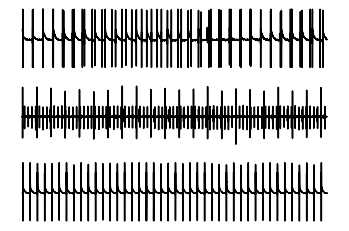

In [10]:
starttime = 240
endtime = 242   #in seconds
#%matplotlib qt

for j,i in enumerate([12,62,53]):
    plt.subplot(3,1,j+1)
    filepath = '/home/dexter/' + lines[i][:-4] + '/' + lines[i]
    with dl.open_data(filepath, -1, 60.0) as data:
        dt = 1/data.samplerate
        # do something with the content of the file:
        x = np.arange(starttime,endtime,dt)
        y = data[starttime*data.samplerate:endtime*data.samplerate,0]
        plt.plot(x,y,c='k')
        plt.axis('off')
        if j == 2:
            plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')

In [9]:
%matplotlib qt
plt.plot(x,y,c='k')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

# dexters final analysis code

In [10]:
eods = pt.analyze_pulse_data(filepath, starttime=starttime, endtime=endtime ,save=False)

blockamount:  1910
0 % CLUSTERING
(328, 7)


ValueError: x and y can be no greater than 2-D, but have shapes (7,) and (7, 328, 0)

In [ ]:
eods.shape

## plot of endresult

In [ ]:
%matplotlib qt
plot_events_on_data(eods[:4,:],y,-1)
#plot_events_on_data(eods,y,0)

In [ ]:
%matplotlib inline

for i in range(len(lines)):
    filepath = '/home/dexter/' + lines[i][:-4] + '/' + lines[i]
    with dl.open_data(filepath, -1, 1.0) as data:
        dt = 1/data.samplerate
        # do something with the content of the file:
        x = np.arange(starttime,endtime,dt)
        y = data[starttime*data.samplerate:endtime*data.samplerate,0]
    try:
        print(filepath)
        eods = pt.analyze_pulse_data(filepath, starttime=starttime, endtime=endtime ,save=False)
        plot_events_on_data(eods[:4,:],y,-1)
        plot_events_on_data(eods,y,0)
    except:
        pass

In [ ]:
eods[:3].shape

- paste together by waveshape
- is the algorithm too slow now it has to do a longer autocorrelation?
- get rid of peak classes where the firing rate is higher than possible in nature
- set higher threshold
- add peak hight to clustering algorithm input so only one classification step is needed.
- make a sort of online clustering algorithm that only remembers recent data.
- plot the different wavetypes that are found